<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/Forest_Cover_Type_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data loading and EDA

Forest Cover Type Dataset Description
This dataset represents 30m x 30m land patches from the Roosevelt National Forest in northern Colorado. The goal is to predict the forest cover type based on various environmental features.

Target Variable
Cover_Type (Integer Classification):

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

Feature Columns
1. Elevation (meters) – Height above sea level; one of the strongest predictors (tree species vary by altitude).

2. Aspect (degrees, 0–360) – Compass direction the slope faces; influences sunlight and moisture.

3. Slope (degrees) – Steepness of the terrain; affects soil stability and sunlight exposure.

4. Horizontal_Distance_To_Hydrology (meters) – Horizontal distance to the nearest water body.

5. Vertical_Distance_To_Hydrology (meters) – Vertical elevation difference to the nearest water body.

6. Horizontal_Distance_To_Roadways (meters) – Distance to the nearest road; may reflect human disturbance.

7. Hillshade_9am (0–255) – Sunlight intensity at 9 AM, summer solstice (higher = more light).

8. Hillshade_Noon (0–255) – Sunlight intensity at noon, summer solstice.

9. Hillshade_3pm (0–255) – Sunlight intensity at 3 PM, summer solstice.

10. Horizontal_Distance_To_Fire_Points (meters) – Distance to the nearest wildfire ignition point.

11. Categorical Features
Wilderness_Area (4 binary columns) – Each column indicates if the patch lies in a specific protected wilderness area (1 = present, 0 = absent).

12.Soil_Type (40 binary columns) – Each column corresponds to a soil category (1 = present, 0 = absent).

Dataset Characteristics
Each row represents one land patch (30m x 30m).

**The dataset is multi-class classification (7 forest types).
Features are a mix of continuous (elevation, distances, hillshade) and binary (wilderness and soil types).**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/forest_cover_train.csv')

In [4]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [6]:
data.shape

(15120, 56)

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [8]:
data['Cover_Type'].value_counts()

,count
Cover_Type,
5,2160
2,2160
1,2160
7,2160
3,2160
6,2160
4,2160


**Here the target variable classification is well balanced.**

<Axes: xlabel='Cover_Type', ylabel='Elevation'>

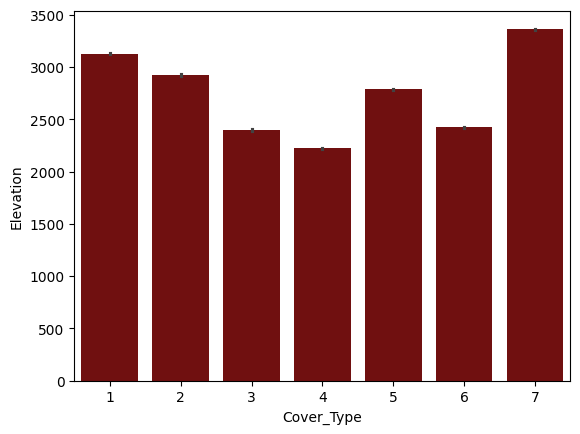

In [9]:
sns.barplot(data=data,x='Cover_Type',y='Elevation',color='maroon')

In [10]:
data.corr()['Cover_Type']

,Cover_Type
Id,0.108363
Elevation,0.016090
Aspect,0.008015
Slope,0.087722
Horizontal_Distance_To_Hydrology,-0.010515
Vertical_Distance_To_Hydrology,0.075647
Horizontal_Distance_To_Roadways,-0.105662
Hillshade_9am,-0.010286
Hillshade_Noon,-0.098905
Hillshade_3pm,-0.053399


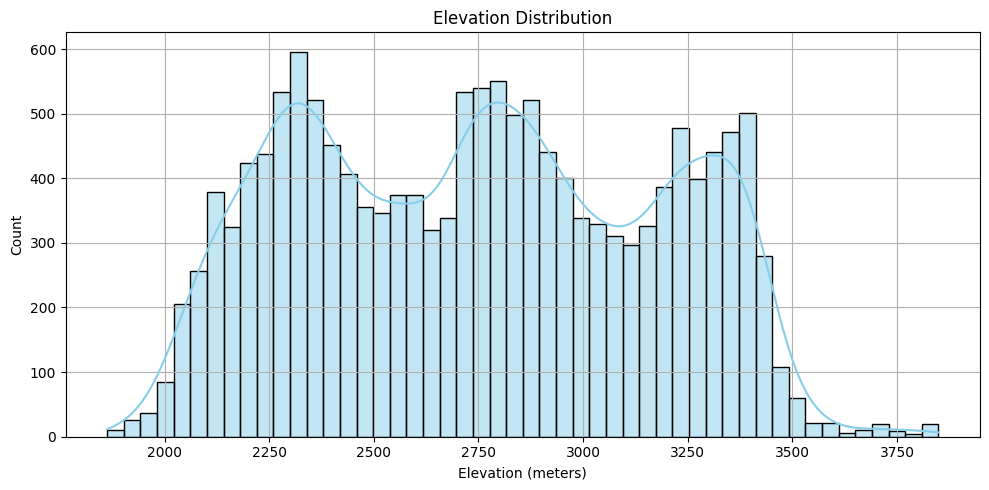

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Elevation', bins=50, kde=True, color='skyblue')
plt.title('Elevation Distribution')
plt.xlabel('Elevation (meters)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-887110706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Cover_Type', y='Elevation', palette='Set2')


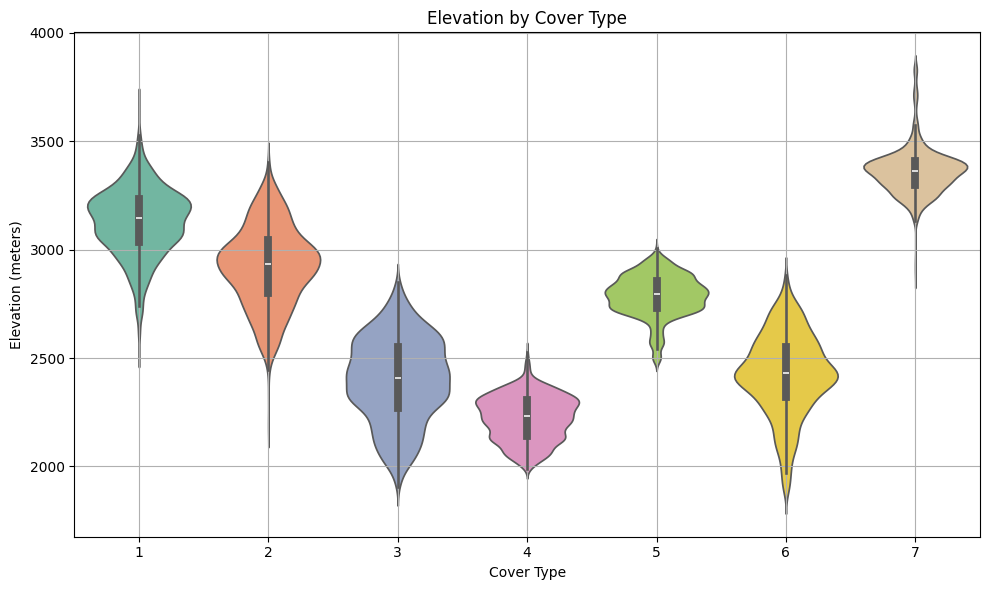

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Cover_Type', y='Elevation', palette='Set2')
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation (meters)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [14]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [16]:
data1=data[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']]

Text(0.5, 1.0, 'Correlation between other feature along with cover type')

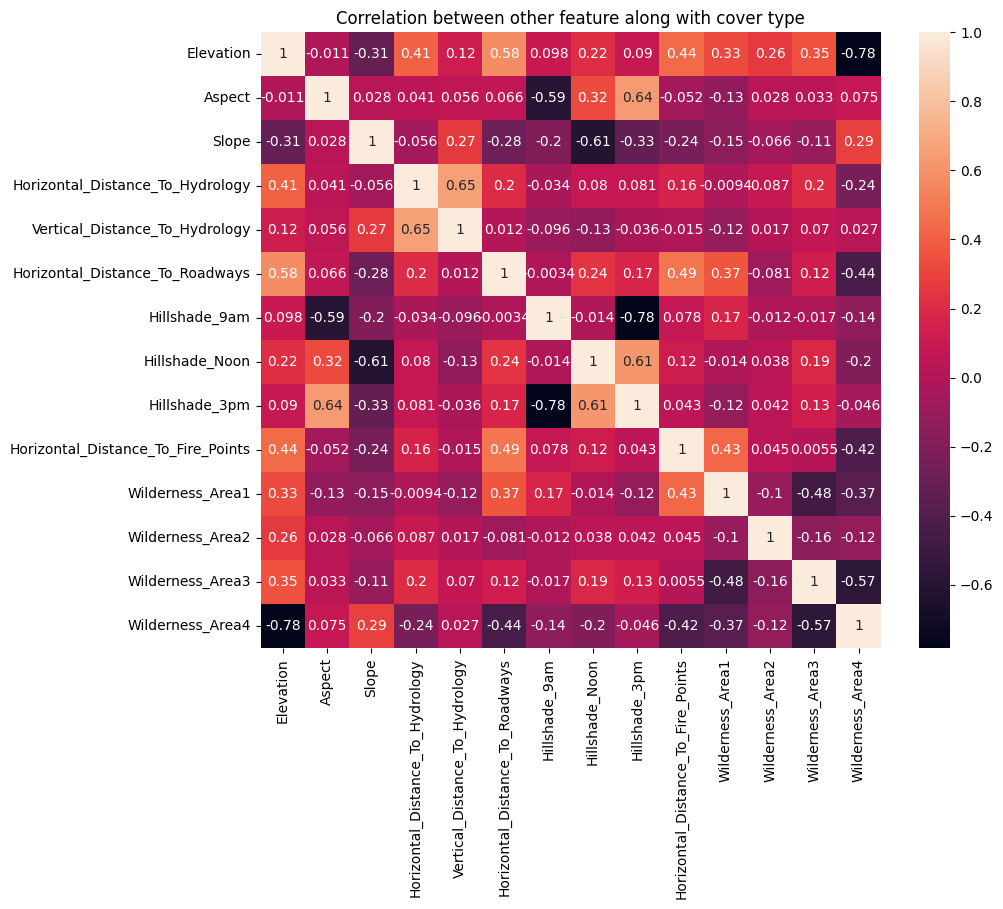

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),annot=True)
plt.title('Correlation between other feature along with cover type')

Text(0.5, 1.0, ' horizantal distance to  fire ignition points to various cover types')

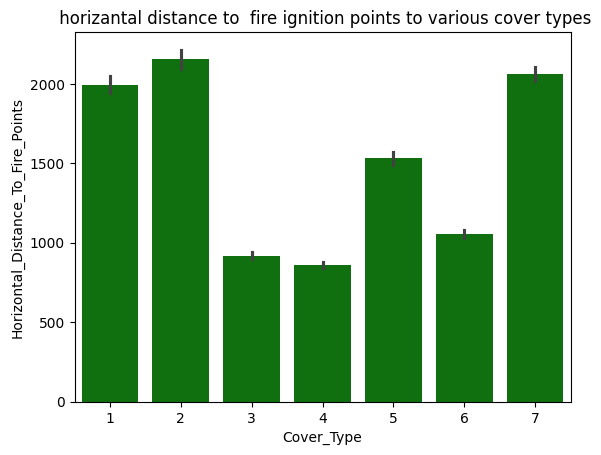

In [59]:
sns.barplot(data=data,x='Cover_Type',y='Horizontal_Distance_To_Fire_Points',color='green')
plt.title(' horizantal distance to  fire ignition points to various cover types')

Text(0.5, 1.0, ' horizantal distance to  roadways to various cover types')

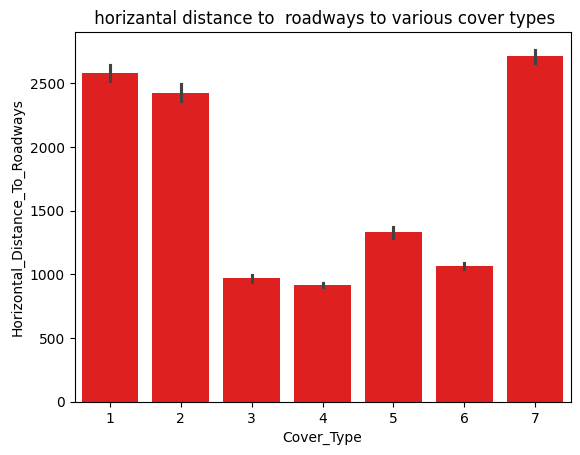

In [60]:
sns.barplot(data=data,x='Cover_Type',y='Horizontal_Distance_To_Roadways',color='red')
plt.title(' horizantal distance to  roadways to various cover types')

In [25]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


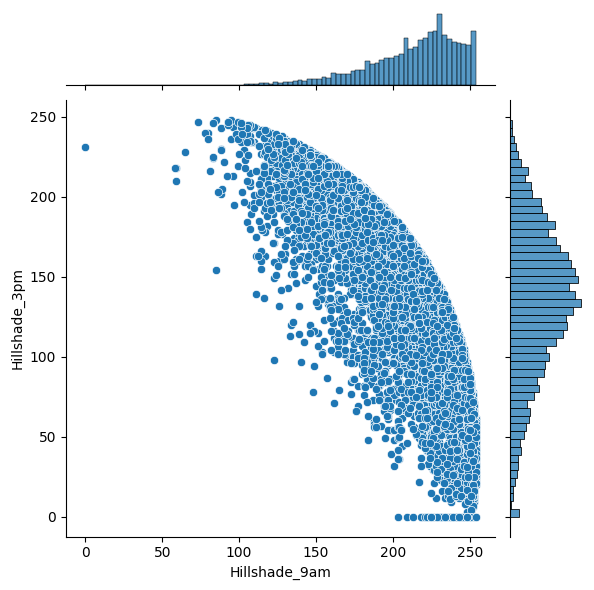

In [63]:
sns.jointplot(data=data,x='Hillshade_9am',y='Hillshade_3pm')

The scatter plot forms a curved, semi-circular shape:

When Hillshade_9am is high, Hillshade_3pm is low (and vice versa).

This is expected because slopes facing east get more light in the morning, while west-facing slopes get more light in the afternoon.

###Model Development

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [82]:
X=data.drop('Cover_Type',axis=1)
y=data['Cover_Type']

In [83]:
sc.fit_transform(X)

array([[-1.73193626, -0.36709512, -0.95997982, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-1.73170715, -0.38146072, -0.9145592 , ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-1.73147804,  0.1309124 , -0.16057691, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       ...,
       [ 1.73147804, -0.61609888, -0.20599753, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [ 1.73170715, -0.62807021,  0.09377856, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [ 1.73193626, -0.65680142,  0.36630228, ..., -0.22490811,
        -0.21313437, -0.1769394 ]])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
rfc = RandomForestClassifier(n_estimators=100)

In [93]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
predictions=rfc.predict(X_test)

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       679
           2       0.80      0.67      0.73       722
           3       0.85      0.82      0.84       704
           4       0.92      0.97      0.95       739
           5       0.89      0.93      0.91       721
           6       0.86      0.89      0.87       722
           7       0.94      0.97      0.95       703

    accuracy                           0.86      4990
   macro avg       0.86      0.86      0.86      4990
weighted avg       0.86      0.86      0.86      4990



<Axes: >

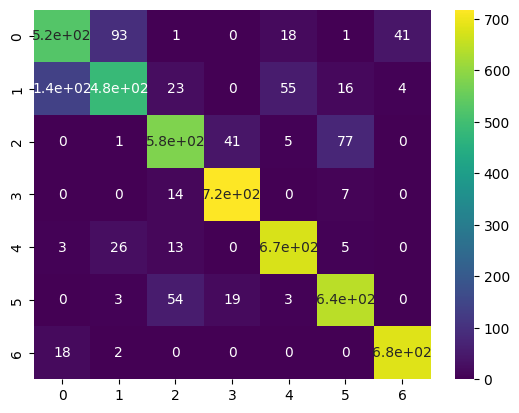

In [101]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')